In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


In [2]:
# Load dataset
df = pd.read_csv('/content/mail_data.csv')

# Display top rows
print("Dataset Preview:")
print(df.head())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Dataset Preview:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

Missing Values:
 Category    0
Message     0
dtype: int64


In [3]:
# Drop rows with null values
df.dropna(inplace=True)

# Map text labels to numbers: 'ham' = 0, 'spam' = 1
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})


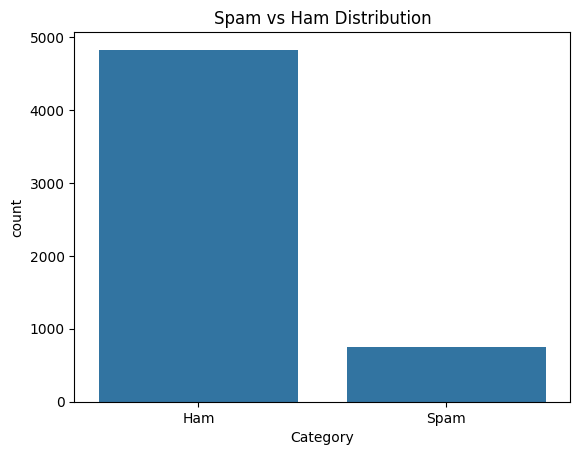

In [ ]:
# Visualize class distribution
sns.countplot(x='Category', data=df)
plt.title("Spam vs Ham Distribution")
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()


In [ ]:
# Define input features and labels
X = df['Message']
y = df['Category']

# Convert text data to numerical using TF-IDF
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_vectorized = vectorizer.fit_transform(X)


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
# Train model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9695067264573991
Precision: 1.0
Recall: 0.7718120805369127

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
from sklearn.svm import LinearSVC

# Train SVM model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Evaluate SVM
y_pred_svm = svm_model.predict(X_test)

print("\n--- SVM Results ---")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))



--- SVM Results ---
Accuracy: 0.979372197309417
Precision: 0.9921875
Recall: 0.8523489932885906
